In [258]:
import numpy as np
from matplotlib import pyplot as plt


$\left( (10 - 10) \mod{10} \right)$ + 1 = 1 $\implies$ Метод Якоби

1. Реализуйте итерационный метод согласно варианту. Метод должен производить фиксированное число итераций и возвращать вектор текущего приближения, вектор невязки и его норму

In [259]:
def countBc(A: np.ndarray, b: np.ndarray)->tuple[np.ndarray, np.ndarray]:
  c = np.zeros(b.size)
  B = np.zeros((b.size, b.size))

  for i in range(b.size):
    for j in range(b.size):
      B[i, j] = -A[i, j] / A[i, i]
    c[i] = b[i] / A[i, i]
    B[i, i] = 0

  return B, c

def Jac(A: np.ndarray, b: np.ndarray, B: np.ndarray, 
        c: np.ndarray, x0: np.ndarray, iter: np.int64=-1)->tuple[np.ndarray, np.ndarray, np.float64]:

  x1 = np.dot(B, x0) + c
  r = np.dot(A, x0) - b

  if iter == -1:
    eps = 10**(-10)
    while True:
      x0 = x1
      x1 = np.dot(B, x0) + c
      r = np.dot(A, x1) - b
      if np.linalg.norm(r, 2) < eps:
        break

  else:
    for _ in range(iter):
      x0 = x1
      x1 = np.dot(B, x0) + c
      r = np.dot(A, x1) - b

  return x1, r, np.linalg.norm(r, 2)

2. Продемонстрируйте работоспособность метода на ряде примеров с различными матрицами и разным количеством неизвестных.


In [260]:
n = 10

A = np.random.uniform(-2, 3, size=(n, n))
diag = np.diag(A)*100
np.fill_diagonal(A, diag)

b = np.random.uniform(-2, 3, n)
B, c = countBc(A, b)

print('Норма матрицы B:', np.round(np.linalg.norm(B, 2), 2), '\n')
print('Решение встроенной функцией:', np.round(np.linalg.solve(A, b), 6))

x, r, norm = Jac(A, b, B, c, c)
print('Моё решение:                ', np.round(x, 6), '\n')

print('Вектор невязки:', np.round(r, 6))
print('Его норма:', np.round(norm, 6), '\n')
print('\n')
print('Фиксированное количество итераций')
iter = 1
x1, r1, norm1 = Jac(A, b, B, c, c, iter)
print(f'Было сделано итераций: {iter}')
print('Моё решение:', np.round(x1, 6), '\n')

print('Вектор невязки:', np.round(r1, 6))
print('Его норма:', np.round(norm1, 6), '\n')

Норма матрицы B: 0.14 

Решение встроенной функцией: [-3.4180e-03 -3.4000e-05  1.4317e-02  1.1250e-02  5.6170e-03  1.2881e-02
 -2.0719e-02  9.4960e-03 -3.0660e-03 -1.0890e-02]
Моё решение:                 [-3.4180e-03 -3.4000e-05  1.4317e-02  1.1250e-02  5.6170e-03  1.2881e-02
 -2.0719e-02  9.4960e-03 -3.0660e-03 -1.0890e-02] 

Вектор невязки: [ 0.  0. -0. -0. -0. -0. -0. -0. -0.  0.]
Его норма: 0.0 



Фиксированное количество итераций
Было сделано итераций: 1
Моё решение: [-3.4190e-03 -3.3000e-05  1.4316e-02  1.1250e-02  5.6160e-03  1.2880e-02
 -2.0720e-02  9.4960e-03 -3.0660e-03 -1.0891e-02] 

Вектор невязки: [-1.00e-06  1.60e-04  5.30e-05  1.90e-05 -9.10e-05 -9.20e-05  6.00e-06
 -7.00e-06  3.10e-05  1.47e-04]
Его норма: 0.00026 



3. Реализуйте метод вычисления коэффициентов $\alpha_k$ разложения вектора $\displaystyle x = \sum_{i=1}^n \alpha_i \varphi^i$ по ортонормированному базису $\varphi^k, k \in [1, n]$

$\displaystyle \psi_j^k = \sin{(\pi k j h)}, \quad h = \frac{1}{n+1}, \quad k, j \in [1, n]$

$\displaystyle \varphi^k = \frac{\psi^k}{||\psi_j^k||_2}$

In [261]:
n = 21
h = 1/(n+1)
psi = np.zeros((n, n))

for j in range(1, n+1):
  for k in range(1, n+1):
    psi[j-1, k-1] = np.sin(np.pi*k*j*h)

norms = np.zeros(n)

for j in range(n):
  norms[j] = np.linalg.norm(psi[:, j], 2)

phi = np.zeros((n, n))

for j in range(n):
  phi[:, j] = psi[:, j] / norms[j]

x = np.random.uniform(0, 1, n)

alpha = np.zeros(n)

for i in range(n):
  alpha[i] = np.dot(x, phi[:, i])


sum = 0
for i in range(n):
  sum += phi[:, i]*alpha[i]

print('Исходный вектор:               ', np.round(x, 4))
print('Вектор, полученный разложением:', np.round(sum, 4))


Исходный вектор:                [0.6212 0.9263 0.0637 0.8794 0.433  0.8839 0.2751 0.4252 0.3905 0.7115
 0.3749 0.3255 0.3105 0.288  0.1139 0.0561 0.5438 0.1976 0.6806 0.6932
 0.5921]
Вектор, полученный разложением: [0.6212 0.9263 0.0637 0.8794 0.433  0.8839 0.2751 0.4252 0.3905 0.7115
 0.3749 0.3255 0.3105 0.288  0.1139 0.0561 0.5438 0.1976 0.6806 0.6932
 0.5921]


4. Рассмотрите систему с матрицей $A_h$, возникающей при конечно-разностной аппроксимации одномерного стационарного уравнения теплопроводности.


In [262]:
n = 21
h = 0.2
Ah = np.zeros((n, n))
np.fill_diagonal(Ah, 2)
np.fill_diagonal(Ah[1:, :], -1)
np.fill_diagonal(Ah[:, 1:], -1)
#print(Ah)
Ah = 1/(h**2)*Ah

b = np.random.uniform(-5, 5, n)

B1, c1 = countBc(Ah, b)
print('Норма матрицы B:', np.round(np.linalg.norm(B1, 2), 3), '\n')
x2, r2, norm2 = Jac(Ah, b, B1, c1, c1)

x = np.linalg.solve(Ah, b)
#print('Решение встроенной функцией:', np.round(x, 10))
print('Норма решение Якоби:              ', np.linalg.norm(x2, 2))
print('Норма решения встроенной функцией:', np.linalg.norm(x, 2))

# метод прогонки
def solve(A: np.ndarray, b: np.ndarray)->np.ndarray:
    n = b.size
    res = np.zeros(n)
#Прямой ход
    v, u = np.zeros(n), np.zeros(n)

  #0-ая строка
    v[0], u[0] = (A[0][1])/(-A[0][0]), (-b[0])/(-A[0][0])

  #без 0-ой и (n-1)-ой строк
    for i in range(1, n-1):
        v[i] = (A[i][i+1])/(-A[i][i] - A[i][i-1]*v[i-1])
        u[i] = (A[i][i-1]*u[i-1] - b[i])/(-A[i][i] - A[i][i-1]*v[i-1] )

  #(n-1)-ая строка
    v[n-1] = 0
    u[n-1] = (A[n-1][n-2]*u[n-2] - b[n-1])/(-A[n-1][n-1] - A[n-1][n-2]*v[n-2])

#Обратный ход
    res[n-1] = u[n-1]
    for i in range(n-1, 0, -1):
        res[i-1] = v[i-1] * res[i] + u[i-1]
    return res


xPr = solve(Ah, b)
print('Норма решения прогонкой:          ', np.linalg.norm(xPr, 2))



Норма матрицы B: 0.99 

Норма решение Якоби:               1.2211030389273316
Норма решения встроенной функцией: 1.2211030389289088
Норма решения прогонкой:           1.2211030389289081


5. Вычислите векторы ошибки $e^p = x - x^p$ для $p = 0, 10, 20, ..., 200$, где $x$ - точное решение СЛАУ

In [263]:
x = np.copy(x2)
print('Норма точного решения:', np.linalg.norm(x, 2))

p = np.arange(0, 210, 10)
e = np.zeros((n, n))

x0, r0, norm0 = Jac(Ah, b, B1, c1, c1, p[0])
e[:, 0] = x - x0

for i in range(1, n):
  x2 = x0
  x0, r0, norm0 = Jac(Ah, b, B1, c1, x2, 10)
  e[:, i] = x - x0


Норма точного решения: 1.2211030389273316


6. Вычислите разложение векторов $e^p$ по базису $\varphi^k$

In [264]:
alpha = np.zeros((p.size, p.size))

for i in range(p.size):
  for j in range(p.size):
    alpha[j][i] = np.dot(phi[:, j], e[:, i])

sum = np.zeros((p.size, p.size))

for i in range(p.size):
  sum1 = np.zeros(p.size)
  sum1 = np.dot(phi, alpha[:, i])
  sum[:, i] = sum1

res = np.zeros(p.size)
for i in range(p.size):
  if np.round(np.linalg.norm(e[:, i], 2), 10) != np.round(np.linalg.norm(sum[:, i], 2), 10):
    res[i] = 1

print('Количество ошибок:', res.sum())


Количество ошибок: 0.0


7. Постройте графики зависимости коэффициентов $|\alpha_k^p|$ от номера итерации $p$ для разных коэффициентов $k$ в логорифмической шкале.

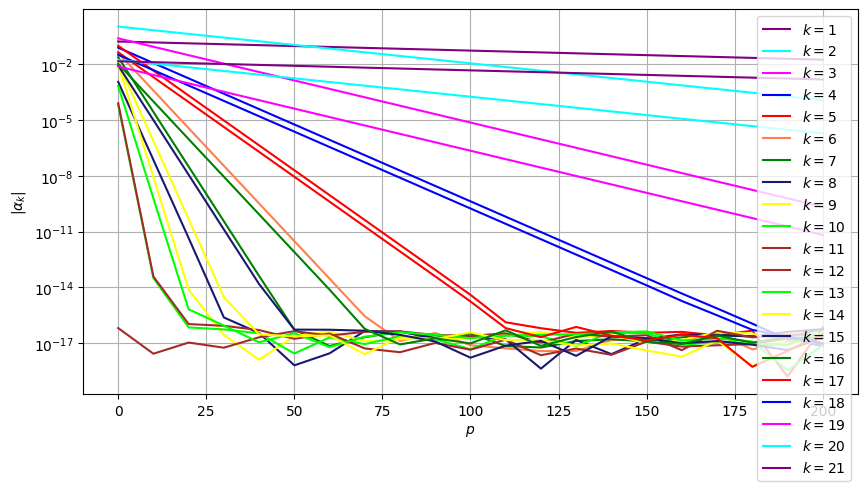

In [265]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

col = np.array(['purple', 'cyan', 'fuchsia', 'blue', 'red', 'coral', 'green', 'midnightblue', 'yellow', 'lime', 'brown',
                'brown', 'lime', 'yellow', 'midnightblue', 'green', 'red', 'blue', 'fuchsia', 'cyan', 'purple'])


axs.set_xlabel('$p$')
axs.set_ylabel(f'|$\\alpha_k$|')
axs.grid()


for i in range(0, 21):
  axs.plot(p, np.abs(alpha[i, :]), color=col[i], label=f'$k=${i+1}')

plt.legend()
plt.legend(loc='upper right')

#plt.xscale('log')
plt.yscale('log')
plt.show()


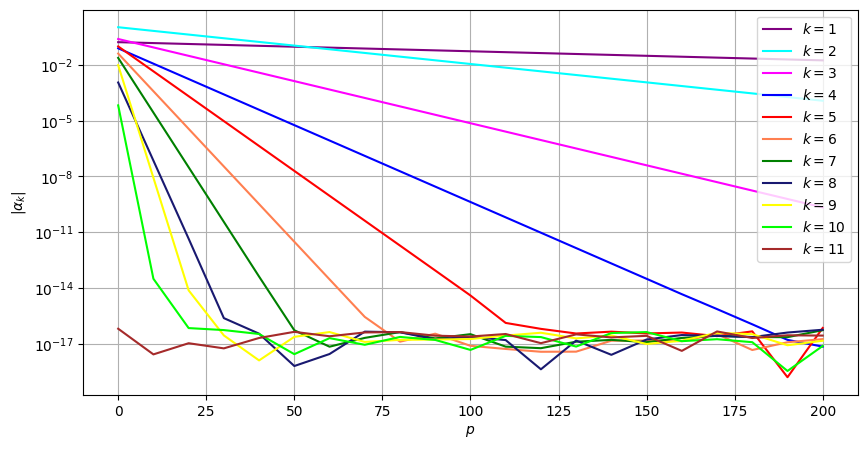

In [266]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

col = np.array(['purple', 'cyan', 'fuchsia', 'blue', 'red', 'coral', 'green', 'midnightblue', 'yellow', 'lime', 'brown'])

axs.set_xlabel('$p$')
axs.set_ylabel(f'|$\\alpha_k$|')
axs.grid()


for i in range(0, 11):
  axs.plot(p, np.abs(alpha[i, :]), color=col[i], label=f'$k=${i+1}')

plt.legend()
plt.legend(loc='upper right')

#plt.xscale('log')
plt.yscale('log')
plt.show()

8. Проанализируйте полученные графики и попробуйте сделать вывод о том, есть ли какая-либо зависимость между номером $k$ коэффициента $\alpha_k^p$ и скоростью его стремления к нулю


Заметим, что для половины значений $k$ коэффициенты $\alpha_k^p$ стремятся к нулю. Далее они начинают расти и, можно сказать, что они равны тем, которые видны для первой половины значений $k$. Связано это с тем, что мы рассматриваем ряд Фурье с вещественными, а не комплексными коэффициентами